<a href="https://colab.research.google.com/github/mishraraaj/Loan-Default-Prediction/blob/main/raj_mishra_Team_2_Capstone_Project_2_Loan_Default_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Loan Default Prediction : Predicting whether a customer will default on a loan.</u></b>

### Numerous companies from financial indutry often invest considerable resources to improve their predictive models with the aim of having better insights into their customers. Such an interest in model improvement has intensified in recent years mostly because of fast development of machine learning and artificial intelligence. For standard lending institution default predictive model with high performance helps to considerably minimize Credit Loss, resulting in higher revenue and profits. Usually the better predictive model the more efficient is the underwriting policy and collection process. A well-functioning model should distinguish creditworthy customers from those that are credit risks. Often, more-predictive credit-decisioning model can identify a greater number of customers within an institution’s specified risk tolerance, which should expand revenues as well.

### In this project the goal is to increase detection of defaulted loans before the loan is issued/offered by P2P lending company - Lending Club. Peer-to-peer lending differs from traditional financial institutions like banks or commercial lending companies.

### So, Lending Club is a mediator between investors and borrowers, earning money by charging both. The main Lending Club interest is to attract more clients and maintain protfolio size. The motivation of borrowers is clear, they want to find as cheap capital as possible, so they're seeking for the best offer at the market, which is available for them. In case of investors the motivation is obvious as well. Investors look for high ROI (return of investments), but remembering that returns are proportional to risks, we may formalize saying, that investors look for appropriate returns/risks ratio. If investors experience losses it may cause churn rate growth.

### The underwriting process for Lending Club looks like this. Borrower applies for the loan, then if he/she meets all the basic requirements - Lending Club using their scoring model assigns client to respective grade. There are 7 grades and 35 sub-grades. Interest rate is dependent on sub-grade. After that, Lending Club gives access to the loan for investors with information about the loan and the borrower (incl. grade and sub-grade) and investors decide whether or not to invest money in this loan. The lower the grade the higher the interest rate, which means, that investors may take higher risks to gain potentially higher returns.

### Seeking for default rate reduction we can end up with too restrictive underwriting policy which does not neccessary correlate with higher ROI for investors, because we'll not let investors choose risky loans, which means lower interests. For Lending Club it probably means the loss of investors with high risk appetite and borrowers with weak credit history, or in case of Lending Club those who need higher loan amount.

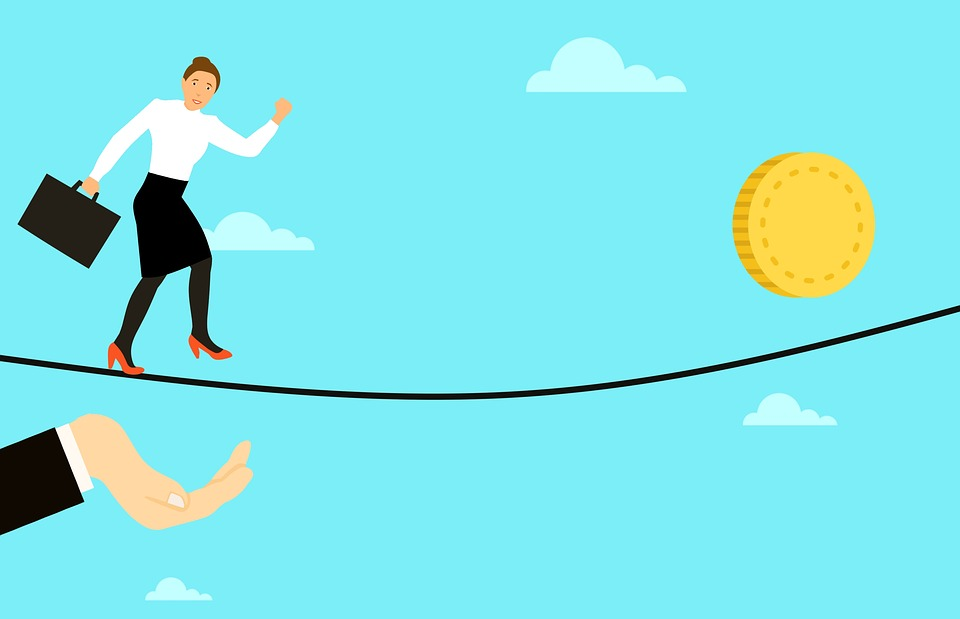

# Problem Statement Analysis
### Loan default occurs when a borrower fails to pay back a debt according to the initial arrangement. In the case of most consumer loans, this means that successive payments have been missed over the course of weeks or months. Fortunately, lenders and loan servicers usually allow a grace period before penalizing the borrower after missing one payment. The period between missing a loan payment and having the loan default is known as delinquency. The delinquency period gives the debtor time to avoid default by contacting their loan servicer or making up missed payments.

Defaulting on a loan will cause a substantial and lasting drop in the debtor's credit score, as well as extremely high interest rates on any future loan. For loans secured with collateral, defaulting will likely result in the pledged asset being seized by the bank. The most popular types of consumer loans that are backed by collateral are mortgages, auto loans and secured personal loans. For unsecured debts like credit cards and student loans, the consequences of default vary in severity according to the type of loan. In the most extreme cases, debt collection agencies can garnish wages to pay back the outstanding debt.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
Working_dir="/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/"
LCD_df=pd.read_csv(Working_dir+'Copy of LCDataDictionary.csv')
lending_club_df=pd.read_csv(Working_dir+'Copy of lending_club_loans.csv',skiprows=1)


In [ ]:
df=lending_club_df.copy()

In [ ]:
LCD_df.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [ ]:
lending_club_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9%,38.0,f,270.78,270.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
lending_club_df.shape

(42538, 115)

In [ ]:
for col in lending_club_df.columns.to_list():
    print(col)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
tot

In [ ]:
import warnings
warnings.filterwarnings("ignore")


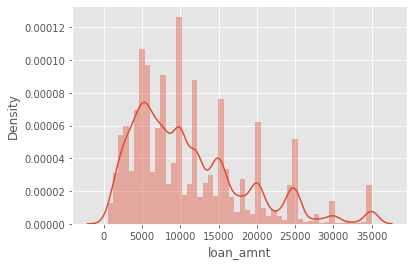

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.distplot(lending_club_df["loan_amnt"])

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64


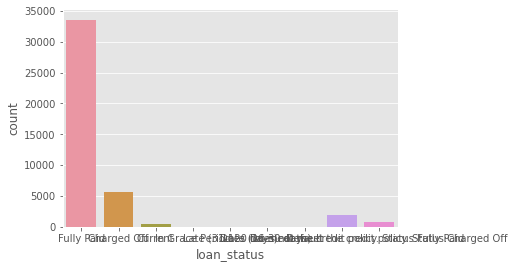

In [ ]:
print(df['loan_status'].value_counts())
sns.countplot(df['loan_status'])

BAsed Upon this we can make our dependent variable

In [ ]:
non_numeric_ls=list(set(df.columns.to_list())-set(df.describe().columns.to_list()))
df[non_numeric_ls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   int_rate             42535 non-null  object
 1   title                42522 non-null  object
 2   desc                 29242 non-null  object
 3   url                  42535 non-null  object
 4   initial_list_status  42535 non-null  object
 5   loan_status          42535 non-null  object
 6   sub_grade            42535 non-null  object
 7   home_ownership       42535 non-null  object
 8   id                   42538 non-null  object
 9   application_type     42535 non-null  object
 10  grade                42535 non-null  object
 11  emp_length           41423 non-null  object
 12  zip_code             42535 non-null  object
 13  last_pymnt_d         42452 non-null  object
 14  earliest_cr_line     42506 non-null  object
 15  issue_d              42535 non-null  object
 16  purp

In [ ]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,42506.000000,15609.000000,3651.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42390.0,0.0,42535.0,0.0,0.0,0.0,42506.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42390.0,42506.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,1.081424,35.017618,59.175568,9.343951,0.058156,1.429786e+04,22.124406,11.849562,11.815891,12005.641023,11298.592611,9664.271346,2239.547094,1.515321,100.307353,13.956737,2612.720097,689.305302,676.382744,0.0,NaN,1.0,NaN,NaN,NaN,0.000094,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.143039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN
std,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,1.527455,22.418427,47.145396,4.496274,0.245713,2.201844e+04,11.592811,125.376563,125.061859,9067.243728,9010.323570,7087.469380,2583.722104,7.827800,718.078716,159.621861,4385.198940,80.202882,119.011555,0.0,NaN,0.0,NaN,NaN,NaN,0.009700,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,29.359579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,0.000000,17.000000,0.000000,6.000000,0.000000,3.635000e+03,13.000000,0.000000,0.000000,5462.787435,4791.415000,4400.000000,657.100000,0.000000,0.000000,0.000000,211.370000,644.000000,640.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

LendingClub made money by charging borrowers an origination fee and investors a service fee. The size of the origination fee depended on the credit grade and ranges to be 1.1–5.0% of the loan amount. The size of the service fee was 1% on all amounts the borrower pays.

In [ ]:
df[non_numeric_ls].head()

,int_rate,title,desc,url,initial_list_status,loan_status,sub_grade,home_ownership,id,application_type,grade,emp_length,zip_code,last_pymnt_d,earliest_cr_line,issue_d,purpose,last_credit_pull_d,verification_status,term,pymnt_plan,addr_state,emp_title,revol_util,next_pymnt_d
0,10.65%,Computer,Borrower added on 12/22/11 > I need to upgra...,https://lendingclub.com/browse/loanDetail.acti...,f,Fully Paid,B2,RENT,1077501,INDIVIDUAL,B,10+ years,860xx,Jan-2015,Jan-1985,Dec-2011,credit_card,Sep-2016,Verified,36 months,n,AZ,NaN,83.7%,NaN
1,15.27%,bike,Borrower added on 12/22/11 > I plan to use t...,https://lendingclub.com/browse/loanDetail.acti...,f,Charged Off,C4,RENT,1077430,INDIVIDUAL,C,< 1 year,309xx,Apr-2013,Apr-1999,Dec-2011,car,Sep-2016,Source Verified,60 months,n,GA,Ryder,9.4%,NaN
2,15.96%,real estate business,NaN,https://lendingclub.com/browse/loanDetail.acti...,f,Fully Paid,C5,RENT,1077175,INDIVIDUAL,C,10+ years,606xx,Jun-2014,Nov-2001,Dec-2011,small_business,Sep-2016,Not Verified,36 months,n,IL,NaN,98.5%,NaN
3,13.49%,personel,Borrower added on 12/21/11 > to pay for prop...,https://lendingclub.com/browse/loanDetail.acti...,f,Fully Paid,C1,RENT,1076863,INDIVIDUAL,C,10+ years,917xx,Jan-2015,Feb-1996,Dec-2011,other,Apr-2016,Source Verified,36 months,n,CA,AIR RESOURCES BOARD,21%,NaN
4,12.69%,Personal,Borrower added on 12/21/11 > I plan on combi...,https://lendingclub.com/browse/loanDetail.acti...,f,Current,B5,RENT,1075358,INDIVIDUAL,B,1 year,972xx,Sep-2016,Jan-1996,Dec-2011,other,Sep-2016,Source Verified,60 months,n,OR,University Medical Group,53.9%,Oct-2016


Description of all the Columns

acc_now_delinq:For the perspective of a credit card company, a particular credit card is said to be delinquent if the customer in question has failed to make their minimum monthly payment for 30 days from their original due date


all_util- The balance-to-limit ratio is also known as credit utilization ratio, and is used in the calculation of credit scores. Having a low ratio both overall and on each card can improve your credit score.

In [ ]:
LCD_df.shape

(117, 2)

In [ ]:
df.drop(columns=['url'])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9%,38.0,f,270.78,270.78,3784.490000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,NaN,< 1 year,RENT,110000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,n,"I need to pay $2,100 for fixing my Volvo :) A...",other,

In [ ]:
columns_wit99nans=df[df.columns[df.isnull().mean() > 0.99]].columns.to_list()

In [ ]:
df[df['loan_status'].isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39786,Loans that do not meet the credit policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42537,Total amount funded in policy code 2: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['loan_status'].isna().sum()

3

These doent contains asy of information

In [ ]:
df=df[~df['loan_status'].isna()]

In [ ]:
df.drop(columns=columns_wit99nans,inplace=True)

In [ ]:
dic= dict(zip(LCD_df["LoanStatNew"], LCD_df['Description']))

Devided The Features Among Team I Am dealing with from 31 to 45

## Understanding **Features**

In [ ]:
features=[]
for n,i in enumerate(df.columns.to_list()):
    if n>30 and n<46:
        print(f'{n}:{i}:-{dic[i]}')
        features.append(i)

31:mths_since_last_record:-The number of months since the last public record.
32:open_acc:-The number of open credit lines in the borrower's credit file.
33:pub_rec:-Number of derogatory public records
34:revol_bal:-Total credit revolving balance
35:revol_util:-Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
36:total_acc:-The total number of credit lines currently in the borrower's credit file
37:initial_list_status:-The initial listing status of the loan. Possible values are – W, F
38:out_prncp:-Remaining outstanding principal for total amount funded
39:out_prncp_inv:-Remaining outstanding principal for portion of total amount funded by investors
40:total_pymnt:-Payments received to date for total amount funded
41:total_pymnt_inv:-Payments received to date for portion of total amount funded by investors
42:total_rec_prncp:-Principal received to date
43:total_rec_int:-Interest received to date
44:total_rec_late_

### **What Is a Line of Credit (LOC)?**

A line of credit (LOC) is a preset borrowing limit that can be used at any time. The borrower can take money out as needed until the limit is reached, and as money is repaid, it can be borrowed again in the case of an open line of credit.
### **Derogatory Public Record**

The only type of public record information that would appear on your credit report is a bankruptcy filing., Bankruptcy information is collected and updated regularly from the courts. Filing for bankruptcy is considered derogatory because you are telling all your lenders that you will not be able to pay them in full, or at all.

### **Revolving balance**
In credit card terms, a revolving balance is the portion of credit card spending that goes unpaid at the end of a billing cycle. The amount can vary, going up or down depending on the amount borrowed and the amount repaid.


## What Is a Charge-Off?
A charge-off is a debt, for example on a credit card, that is deemed unlikely to be collected by the creditor because the borrower has become substantially delinquent after a period of time. However, a charge-off does not mean a write-off of the debt entirely. Having a charge-off can mean serious repercussions on your credit history and future borrowing ability.



## **The outstanding principal balance**
The outstanding principal balance of a mortgage is simply the total amount of money it would take to pay off the loan in full. How much this amount is depends on how much was originally borrowed, how much has been paid down, and what the annual interest rate is.

In [ ]:
df[features].describe()

,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries
count,3651.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000
mean,59.175568,9.343951,0.058156,1.429786e+04,22.124406,11.849562,11.815891,12005.641023,11298.592611,9664.271346,2239.547094,1.515321,100.307353
std,47.145396,4.496274,0.245713,2.201844e+04,11.592811,125.376563,125.061859,9067.243728,9010.323570,7087.469380,2583.722104,7.827800,718.078716
min,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,0.000000,3.635000e+03,13.000000,0.000000,0.000000,5462.787435,4791.415000,4400.000000,657.100000,0.000000,0.000000
50%,85.000000,9.000000,0.000000,8.821000e+03,20.000000,0.000000,0.000000,9680.084710,8955.040000,8000.000000,1339.160000,0.000000,0.000000
75%,101.000000,12.000000,0.000000,1.725100e+04,29.000000,0.000000,0.000000,16421.755103,15525.180000,13425.000000,2802.950000,0.000000,0.000000
max,129.000000,47.000000,5.000000,1.207359e+06,90.000000,3555.850000,3553.300000,58563.679929,58563.680000,35000.020000,23823.750000,209.000000,29623.350000


In [ ]:
dic = {"loan_status":{ "Fully Paid": 0, "Charged Off": 1,'Does not meet the credit policy. Status:Fully Paid':1,
'Does not meet the credit policy. Status:Charged Off':1,'In Grace Period':1,'Late (31-120 days)':1 ,'Late (16-30 days)':1,'Default':1}}
df = df.replace(dic)

In [ ]:
df=df[df["loan_status"]!='Current']

In [ ]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,0,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,NaN,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,1,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,NaN,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,0,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,NaN,Apr-2016,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
5,1075269,1311441.0,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,730.0,734.0,3.0,NaN,NaN,9.0,0.0,7963.0,28.3%,12.0,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-2015,161.03,NaN,Jan-2016,679.0,675.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,73582,73096.0,3500.0,3500.0,225.0,36 months,10.28%,113.39,C,C1,NaN,< 1 year,RENT,180000.0,Not Verified,Jun-2007,1,n,https://lendingclub.com/browse/loanDetail.acti...,I am getting married on July 28 and will need ...,other,Wedding coming up,100xx,NY,10.00,NaN,NaN,685.0,689.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,3719.431070,239.11,3500.00,219.43,0.00,0.00,0.00,Mar-2008,0.00,Mar-2008,Feb-2013,819.0,815.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42532,72998,72992.0,1000.0,1000.0,0.0,36 months,9.64%,32.11,B,B4,Halping hands company inc.,< 1 year,RENT,12000.0,Not Verified,Jun-2007,1,n,https://lendingclub.com/browse/loanDetail.acti...,I would like to buy some new fu

In [ ]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42022 entries, 0 to 42535
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mths_since_last_record  3635 non-null   float64
 1   open_acc                41993 non-null  float64
 2   pub_rec                 41993 non-null  float64
 3   revol_bal               42022 non-null  float64
 4   revol_util              41932 non-null  object 
 5   total_acc               41993 non-null  float64
 6   initial_list_status     42022 non-null  object 
 7   out_prncp               42022 non-null  float64
 8   out_prncp_inv           42022 non-null  float64
 9   total_pymnt             42022 non-null  float64
 10  total_pymnt_inv         42022 non-null  float64
 11  total_rec_prncp         42022 non-null  float64
 12  total_rec_int           42022 non-null  float64
 13  total_rec_late_fee      42022 non-null  float64
 14  recoveries              42022 non-null

In [ ]:
categorical_value= ['revol_util','initial_list_status']
df[categorical_value[0]].value_counts()

0%        1063
40.7%       65
0.2%        64
63%         63
0.1%        61
          ... 
58.19%       1
103.9%       1
36.88%       1
16.02%       1
0.83%        1
Name: revol_util, Length: 1119, dtype: int64

In [ ]:
df[categorical_value[1]].value_counts()

f    42022
Name: initial_list_status, dtype: int64

Contains Only One Value Throug Out So we can remove This Column as well


In [ ]:
df.drop(columns=categorical_value[1],inplace=True)

In [ ]:

df['revol_util'] = df['revol_util'].str.replace('%', '')

In [ ]:
df['revol_util']

0        83.7
1         9.4
2        98.5
3          21
5        28.3
         ... 
42531     NaN
42532     NaN
42533     NaN
42534     NaN
42535     NaN
Name: revol_util, Length: 42022, dtype: object

In [ ]:
df['loan_status']=df['loan_status'].astype(int)

In [ ]:
df['revol_util']=df['revol_util'].astype(float)

In [ ]:
features=list(set(features)-set(['initial_list_status']))

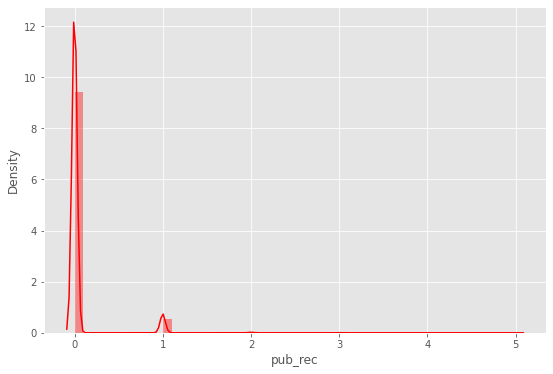

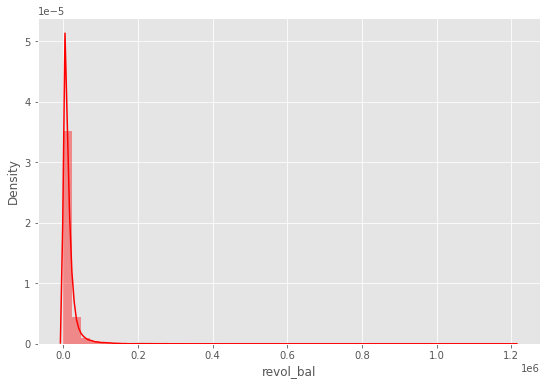

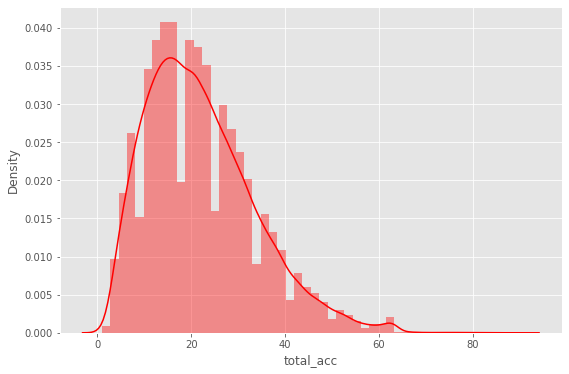

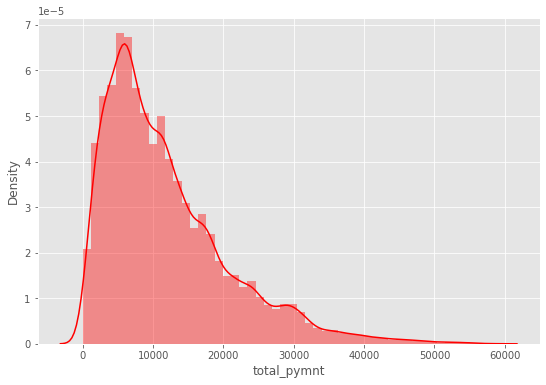

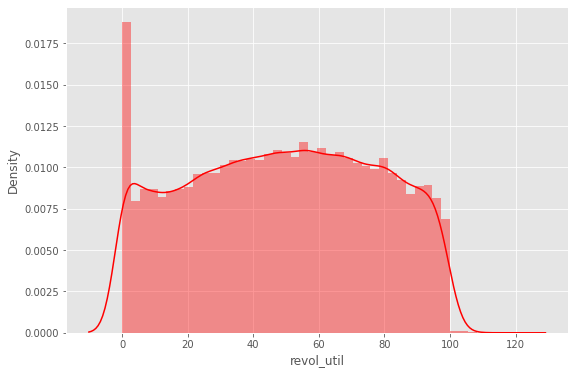

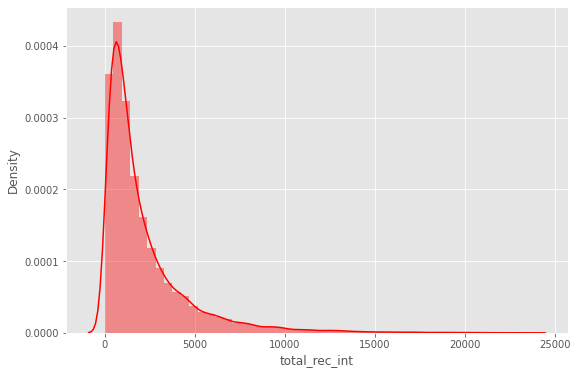

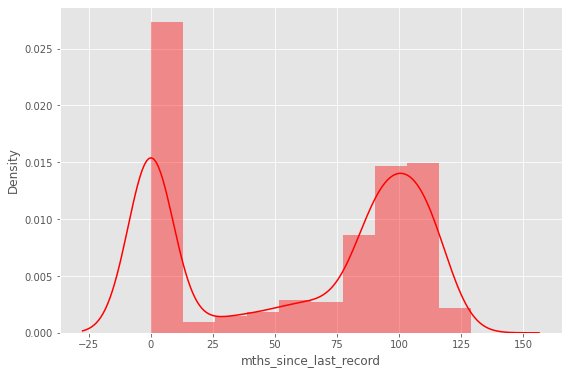

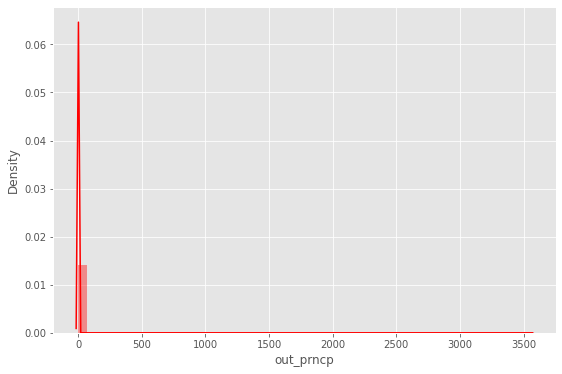

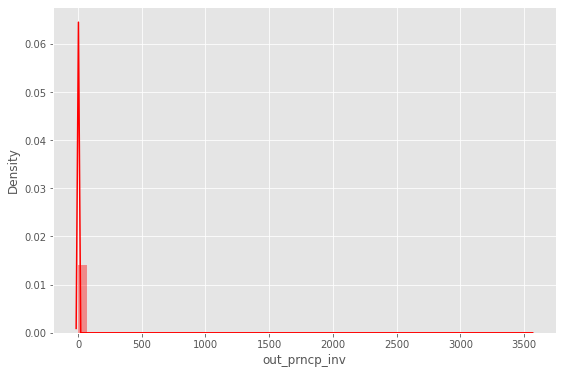

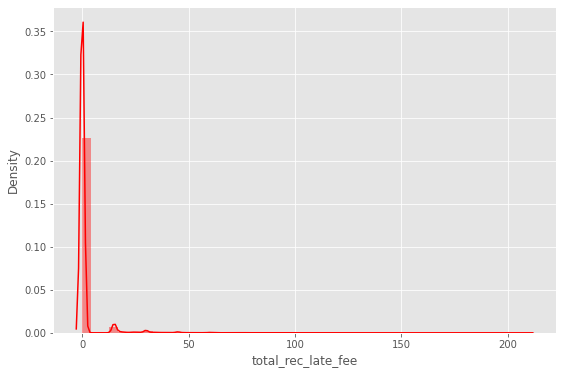

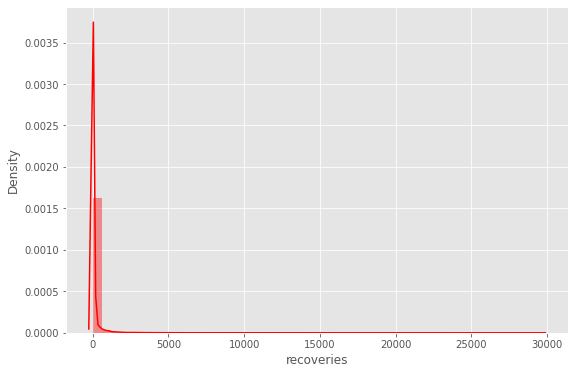

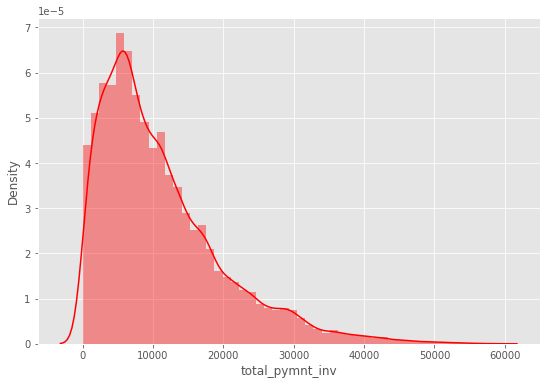

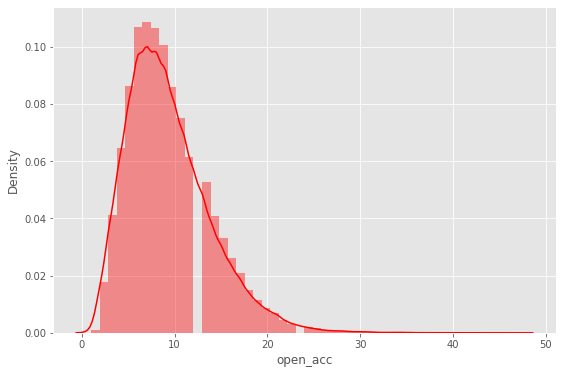

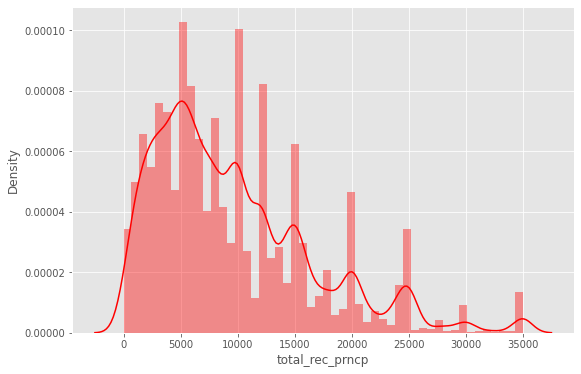

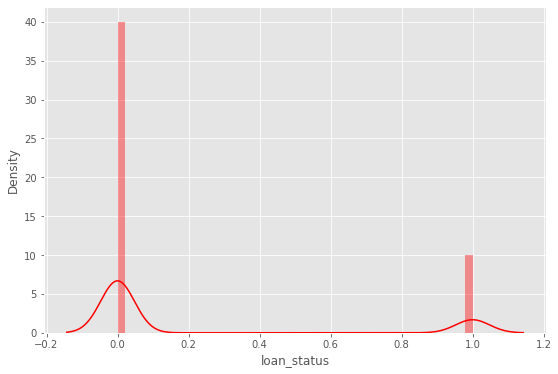

In [ ]:
for col in features+['loan_status']:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        feature = df[col]

        sns.distplot(x=feature,color='red')
        plt.xlabel(col)

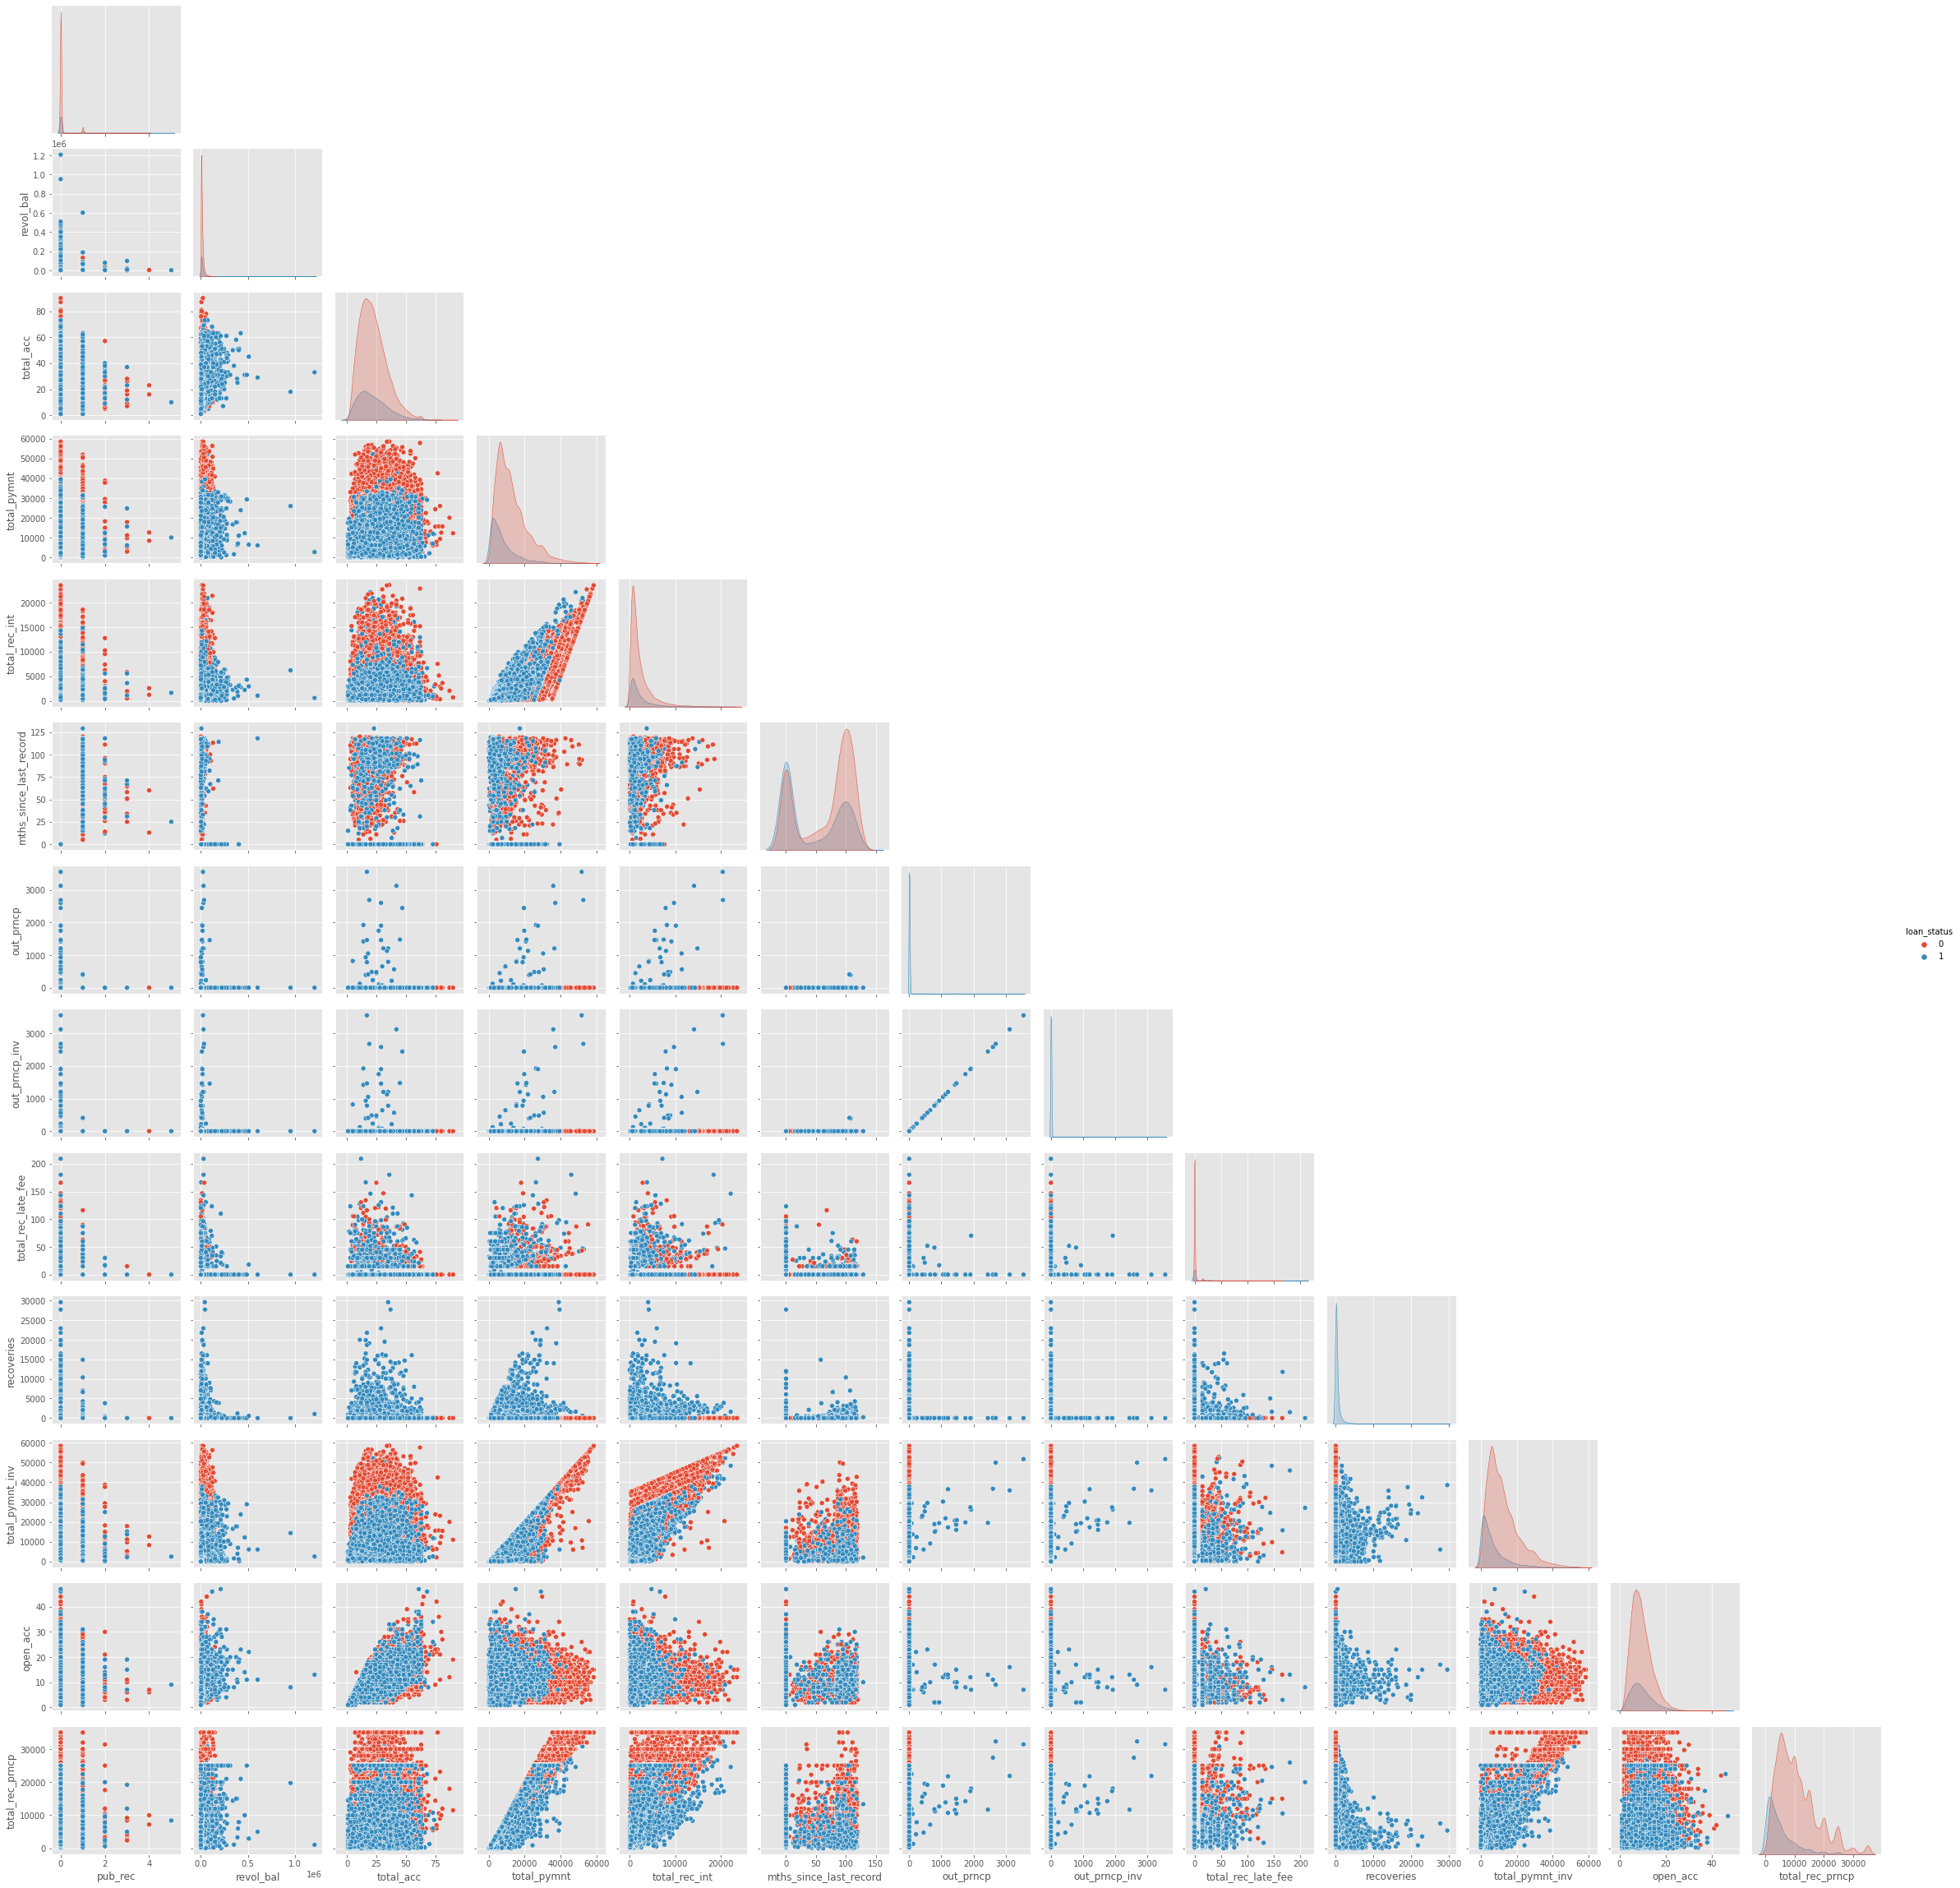

In [ ]:
columns=features+['loan_status']
df=df[columns].copy()
sns.pairplot(df,corner=True,hue='loan_status')

In [ ]:
df.isna().sum()

pub_rec                      29
revol_bal                     0
total_acc                    29
total_pymnt                   0
revol_util                   90
total_rec_int                 0
mths_since_last_record    38387
out_prncp                     0
out_prncp_inv                 0
total_rec_late_fee            0
recoveries                    0
total_pymnt_inv               0
open_acc                     29
total_rec_prncp               0
loan_status                   0
dtype: int64

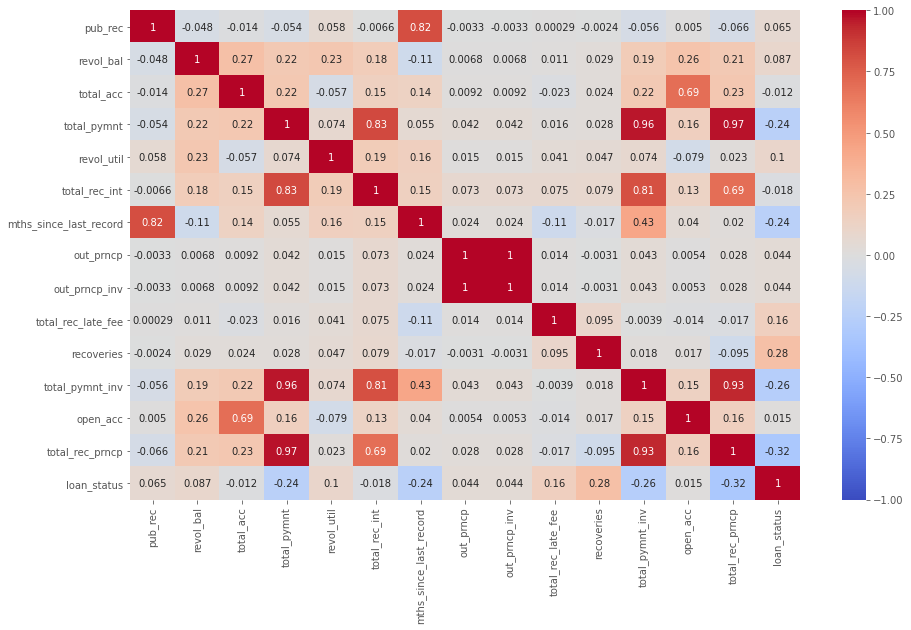

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,vmin=-1,cmap='coolwarm')

## Imputing Missing Values USing Knn

In [ ]:
df.corr()

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [ ]:
X=df.values

In [ ]:
imputer.fit(X)

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=5, weights='uniform')

In [ ]:
Xtrans = imputer.transform(X)

In [ ]:
Xtrans.shape

(42022, 15)

In [ ]:
new_df=pd.DataFrame(Xtrans,columns=df.columns.to_list())

In [ ]:
new_df.isna().sum()

pub_rec                   0
revol_bal                 0
total_acc                 0
total_pymnt               0
revol_util                0
total_rec_int             0
mths_since_last_record    0
out_prncp                 0
out_prncp_inv             0
total_rec_late_fee        0
recoveries                0
total_pymnt_inv           0
open_acc                  0
total_rec_prncp           0
loan_status               0
dtype: int64

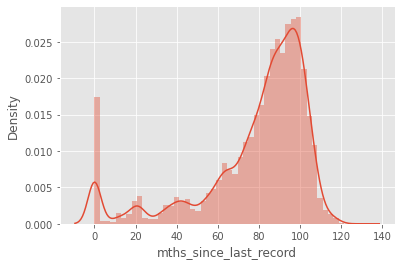

In [ ]:
sns.distplot(new_df['mths_since_last_record'])

In [ ]:
new_df[['out_prncp','out_prncp_inv']].corr()

,out_prncp,out_prncp_inv
out_prncp,1.000000,0.999994
out_prncp_inv,0.999994,1.000000


These Columns Are Exactly similar and create redundancy

In [ ]:
new_df.drop(columns=['out_prncp_inv'],inplace=True)

In [ ]:
new_df.describe()

,pub_rec,revol_bal,total_acc,total_pymnt,revol_util,total_rec_int,mths_since_last_record,out_prncp,total_rec_late_fee,recoveries,total_pymnt_inv,open_acc,total_rec_prncp,loan_status
count,42022.000000,4.202200e+04,42022.000000,42022.000000,42022.000000,42022.000000,42022.000000,42022.000000,42022.000000,42022.000000,42022.000000,42022.000000,42022.000000,42022.000000
mean,0.058436,1.425350e+04,22.103113,11848.293081,48.933571,2170.291186,78.873338,0.904825,1.513398,101.531895,11134.294299,9.335058,9574.956695,0.200752
std,0.246091,2.207401e+04,11.604920,8902.616545,28.414671,2467.540239,26.613444,41.165506,7.803031,722.362582,8835.034960,4.500289,7025.340102,0.400568
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.608000e+03,13.000000,5428.767456,25.500000,649.525000,71.200000,0.000000,0.000000,0.000000,4743.827500,6.000000,4325.000000,0.000000
50%,0.000000,8.773000e+03,20.000000,9579.480283,49.400000,1320.715000,87.000000,0.000000,0.000000,0.000000,8864.880000,9.000000,8000.000000,0.000000
75%,0.000000,1.715250e+04,29.000000,16191.731751,72.600000,2728.342500,96.800000,0.000000,0.000000,0.000000,15285.300000,12.000000,13050.000000,0.000000
max,5.000000,1.207359e+06,90.000000,58563.679929,119.000000,23563.680000,129.000000,3555.850000,209.000000,29623.350000,58563.680000,47.000000,35000.020000,1.000000
